In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
from algorithms import *
from data_gen import *
from spectrum_gen import *
from visualizations import *
from analysis import *
from comparisons import *
# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.

adata_neg , adata_pos = read_chlamydomonas_files(n_obs=3000)



In [2]:
sc.pp.filter_cells(adata_neg, min_genes=100)
sc.pp.filter_cells(adata_pos, min_genes=100)
sc.pp.normalize_per_cell(adata_neg, counts_per_cell_after=1e4)
sc.pp.log1p(adata_neg)
sc.pp.normalize_per_cell(adata_pos, counts_per_cell_after=1e4)
sc.pp.log1p(adata_pos)

adata_unit = adata_neg.concatenate(adata_pos)
bdata_unit = copy.deepcopy(adata_unit.copy())
filter_result = sc.pp.filter_genes_dispersion(
        bdata_unit.X,  n_top_genes=7000, log=False
    )
adata_unit._inplace_subset_var(filter_result.gene_subset)
adata_neg._inplace_subset_var(filter_result.gene_subset)  # filter genes
adata_pos._inplace_subset_var(filter_result.gene_subset)  # filter genes


In [3]:
import random
gene_list = read_chl_gene_list() #read the list of the genes that are assitated with the diurbal cycle, sort them according to the peak time phase
chl_genes = [x for x in gene_list if x in adata_pos.var_names]
orig_adata_pos = copy.deepcopy(adata_pos)
orig_adata_neg = copy.deepcopy(adata_neg)
tmp_score=0
num_of_genes=int(len(chl_genes))/2
for i in range(50):
    adata_pos = copy.deepcopy(orig_adata_pos)
    adata_neg = copy.deepcopy(orig_adata_neg)
    tmp_genes_num =  random.randint(1, len(chl_genes))
    s_genes = chl_genes[:tmp_genes_num]
    g2m_genes = chl_genes[tmp_genes_num:]
    sc.tl.score_genes_cell_cycle(adata_pos, s_genes=s_genes, g2m_genes=g2m_genes)
    sc.pp.regress_out(adata_pos, ['S_score', 'G2M_score'])
    sc.tl.score_genes_cell_cycle(adata_neg, s_genes=s_genes, g2m_genes=g2m_genes)
    sc.pp.regress_out(adata_neg, ['S_score', 'G2M_score'])
    adata_unit = adata_neg.concatenate(adata_pos)
    labels = adata_unit.obs["FE"]
    if (silhouette_score(adata_unit.X,labels))>tmp_score:
        tmp_score =(silhouette_score(adata_unit.X,labels))
        num_of_genes = tmp_genes_num
print("The chosen is: " +str(num_of_genes))


/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FE' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'phase' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be

/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'phase' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FE' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be

/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FE' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'phase' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be

/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'phase' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FE' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be

/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FE' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'phase' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be

/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'phase' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FE' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be

/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FE' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'phase' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be

/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'phase' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FE' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be

/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FE' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'phase' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be

/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'phase' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FE' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be

The chosen is: 11


/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FE' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'phase' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be

silhoutte score before : 0.0009868812
davies_bouldin_score: 136860121.54757524
calinski_harabasz_score: 6.256845928732184e-13


/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FE' as categorical


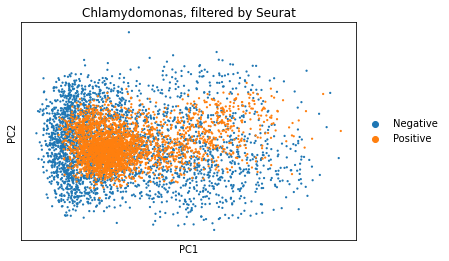

In [4]:
adata_pos = copy.deepcopy(orig_adata_pos)
adata_neg = copy.deepcopy(orig_adata_neg)
s_genes = chl_genes[:num_of_genes]
g2m_genes = chl_genes[num_of_genes:]
sc.tl.score_genes_cell_cycle(adata_pos, s_genes=s_genes, g2m_genes=g2m_genes)
sc.pp.regress_out(adata_pos, ['S_score', 'G2M_score'])
sc.tl.score_genes_cell_cycle(adata_neg, s_genes=s_genes, g2m_genes=g2m_genes)
sc.pp.regress_out(adata_neg, ['S_score', 'G2M_score'])
adata_unit = adata_neg.concatenate(adata_pos)
labels = adata_unit.obs["FE"]
print("silhoutte score before : " +str(silhouette_score(adata_unit.X,labels)))
print("davies_bouldin_score: "+str(davies_bouldin_score(adata_unit.X,labels)))
print("calinski_harabasz_score: "+str(calinski_harabasz_score(adata_unit.X,labels)))
sc.tl.pca(adata_unit)
sc.pl.pca(adata_unit,color="FE" ,title="Chlamydomonas, filtered by Seurat")
